# Web scraping and sentiment analysis

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [2]:
## Scrapping the Shershaah movie reviews from IMDB
for i in range(1,40):
  Shershaah_review=[] 
  url="https://www.imdb.com/title/tt10295212/reviews/?ref_=tt_ql_urv"+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")
  reviews = soup.find_all("div",attrs={"class","text show-more__control"}) 
  for i in range(len(reviews)):
    Shershaah_review.append(reviews[i].text)

In [3]:
## all reviews in single peragraph
Shershaah_reviews = " ".join(Shershaah_review)
Shershaah_reviews

"So realistic..\nActing is superb....\nMusic ...\nVFX ..\nAction...\nRomance....\nPerfect.. Sidharth Malhotra and Kiara Advani nailed it with their performance. This movie truly portrays the jolly nature of Sir Vikram Batra . Those have given 1 star to this movie are the ones who gave 10 stars to movie like radhe , Tubelight etc LOL . Dont listen to them and just watch it , you will not regret .Acting of Sidharth is way way better than other bollywood actors . Just loved his performance in this movie. He couldn't have done better . Same goes to Kiara Advani , simply amazing .Kudos to the crew and actors who worked in this film and gave justice to the personality of Sir Vikram Batra\nJUST WATCH IT WITHOUT ANY DOUBT. No debate, no concerns, no Reviews, just pride.Sidarth Malhotra's portrayal of Capt. Vikram Batra is not just his career best performance, it's also a perfect tribute to one of India's bravest sons. Hands down the best film of Bollywood this year so far.Durge Mata ki Jai. Ev

In [6]:
## Function Removing emojis and unwanted symbols/punctuations
import regex as re
def remove_symbols(text):
    data = re.sub('\S*@\S*\s?\n \d+', '', text).lower()
    data = re.sub('\s+', ' ', data)
    data = re.sub("\'", "", data)
    data = re.sub('[,\.!?]', '', data)
    data = re.sub("[^A-Za-z0-9']+", ' ', data)
    data = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", data)
    return data


In [7]:
custom_stopwords = ["captain", "vikram", "Vikram", "sidharth", "batra", "malhotra", "siddharth", "malhotra", "kiara", "advani", "indian", "army",
                                   "capt", "vikram", "sir" "vikram", "malhotra", "kiara", "movie", "also", "soldiers", "soldier", "sir", "go"]
stop = list(stop_words)
stop_words_new = stop + custom_stopwords
len(stop_words_new)

202

In [8]:
## Function for tokenizing and stop word removels
def clean_reviews(movie_reviews):
    reviews_up = remove_symbols(movie_reviews)
    reviews_tok = nltk.word_tokenize(reviews_up)
    updated_reviews = [token for token in reviews_tok if token not in stop_words_new]
    return updated_reviews

In [9]:
## Clean up the reviews data
updated_reviews = clean_reviews(Shershaah_reviews)
updated_reviews

['realistic',
 'acting',
 'superb',
 'music',
 'vfx',
 'action',
 'romance',
 'perfect',
 'nailed',
 'performance',
 'truly',
 'portrays',
 'jolly',
 'nature',
 'given',
 'star',
 'ones',
 'gave',
 'stars',
 'like',
 'radhe',
 'tubelight',
 'etc',
 'lol',
 'dont',
 'listen',
 'watch',
 'regret',
 'acting',
 'way',
 'way',
 'better',
 'bollywood',
 'actors',
 'loved',
 'performance',
 'couldnt',
 'done',
 'better',
 'goes',
 'simply',
 'amazing',
 'kudos',
 'crew',
 'actors',
 'worked',
 'film',
 'gave',
 'justice',
 'personality',
 'watch',
 'without',
 'doubt',
 'debate',
 'concerns',
 'reviews',
 'pridesidarth',
 'malhotras',
 'portrayal',
 'career',
 'best',
 'performance',
 'perfect',
 'tribute',
 'one',
 'indias',
 'bravest',
 'sons',
 'hands',
 'best',
 'film',
 'bollywood',
 'year',
 'fardurge',
 'mata',
 'ki',
 'jai',
 'every',
 'watch',
 'movieindependence',
 'came',
 'cost',
 'great',
 'like',
 'batrajai',
 'hindproud',
 'armyproud',
 'film',
 'must',
 'watch',
 'people',
 'c

In [10]:
## Converting into string for wordcloud
updated_reviews_str = " ".join(updated_reviews)
updated_reviews_str

'realistic acting superb music vfx action romance perfect nailed performance truly portrays jolly nature given star ones gave stars like radhe tubelight etc lol dont listen watch regret acting way way better bollywood actors loved performance couldnt done better goes simply amazing kudos crew actors worked film gave justice personality watch without doubt debate concerns reviews pridesidarth malhotras portrayal career best performance perfect tribute one indias bravest sons hands best film bollywood year fardurge mata ki jai every watch movieindependence came cost great like batrajai hindproud armyproud film must watch people calling bad cause love story probably dont understand biopic must watch superb acting cant wait sam bahadur finally original content great biopic sid nailed character kiaras performance good supporting cast performance good overall great patriotic watch biography supermovie awesome must watch masterpiece one best war film ever made bollywoodbest performance till d

In [21]:
# WordCloud can be performed on the string inputs.
# Corpus level word cloud
reviews_wordcloud = WordCloud(
                      background_color='White',
                      width=3000,
                      height=2000
                     ).generate(updated_reviews_str)

'From wordcloud we are not able to get proper information about movie.\nso we can do bigram word cloud for better information.'

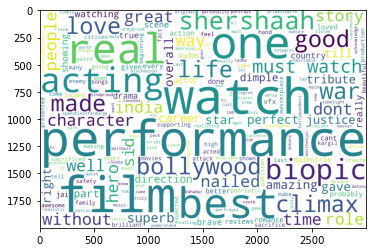

In [22]:
plt.imshow(reviews_wordcloud)
"""From wordcloud we are not able to get proper information about movie.
so we can do bigram word cloud for better information."""

In [33]:
## lost of Bigram words
bigrams_list = list(nltk.bigrams(updated_reviews))
print(bigrams_list)

[('realistic', 'acting'), ('acting', 'superb'), ('superb', 'music'), ('music', 'vfx'), ('vfx', 'action'), ('action', 'romance'), ('romance', 'perfect'), ('perfect', 'nailed'), ('nailed', 'performance'), ('performance', 'truly'), ('truly', 'portrays'), ('portrays', 'jolly'), ('jolly', 'nature'), ('nature', 'given'), ('given', 'star'), ('star', 'ones'), ('ones', 'gave'), ('gave', 'stars'), ('stars', 'like'), ('like', 'radhe'), ('radhe', 'tubelight'), ('tubelight', 'etc'), ('etc', 'lol'), ('lol', 'dont'), ('dont', 'listen'), ('listen', 'watch'), ('watch', 'regret'), ('regret', 'acting'), ('acting', 'way'), ('way', 'way'), ('way', 'better'), ('better', 'bollywood'), ('bollywood', 'actors'), ('actors', 'loved'), ('loved', 'performance'), ('performance', 'couldnt'), ('couldnt', 'done'), ('done', 'better'), ('better', 'goes'), ('goes', 'simply'), ('simply', 'amazing'), ('amazing', 'kudos'), ('kudos', 'crew'), ('crew', 'actors'), ('actors', 'worked'), ('worked', 'film'), ('film', 'gave'), ('ga

In [17]:
## Preparing withot stopwords
bigrams_list_up = [bigram for bigram in bigrams_list if bigram not in custom_stopwords]
bigrams_list_up

[('realistic', 'acting'),
 ('acting', 'superb'),
 ('superb', 'music'),
 ('music', 'vfx'),
 ('vfx', 'action'),
 ('action', 'romance'),
 ('romance', 'perfect'),
 ('perfect', 'nailed'),
 ('nailed', 'performance'),
 ('performance', 'truly'),
 ('truly', 'portrays'),
 ('portrays', 'jolly'),
 ('jolly', 'nature'),
 ('nature', 'given'),
 ('given', 'star'),
 ('star', 'ones'),
 ('ones', 'gave'),
 ('gave', 'stars'),
 ('stars', 'like'),
 ('like', 'radhe'),
 ('radhe', 'tubelight'),
 ('tubelight', 'etc'),
 ('etc', 'lol'),
 ('lol', 'dont'),
 ('dont', 'listen'),
 ('listen', 'watch'),
 ('watch', 'regret'),
 ('regret', 'acting'),
 ('acting', 'way'),
 ('way', 'way'),
 ('way', 'better'),
 ('better', 'bollywood'),
 ('bollywood', 'actors'),
 ('actors', 'loved'),
 ('loved', 'performance'),
 ('performance', 'couldnt'),
 ('couldnt', 'done'),
 ('done', 'better'),
 ('better', 'goes'),
 ('goes', 'simply'),
 ('simply', 'amazing'),
 ('amazing', 'kudos'),
 ('kudos', 'crew'),
 ('crew', 'actors'),
 ('actors', 'worked')

In [34]:
## Preparing data for wordcloud
list_bigram = [' '.join(tup) for tup in bigrams_list]
print (list_bigram)

['realistic acting', 'acting superb', 'superb music', 'music vfx', 'vfx action', 'action romance', 'romance perfect', 'perfect nailed', 'nailed performance', 'performance truly', 'truly portrays', 'portrays jolly', 'jolly nature', 'nature given', 'given star', 'star ones', 'ones gave', 'gave stars', 'stars like', 'like radhe', 'radhe tubelight', 'tubelight etc', 'etc lol', 'lol dont', 'dont listen', 'listen watch', 'watch regret', 'regret acting', 'acting way', 'way way', 'way better', 'better bollywood', 'bollywood actors', 'actors loved', 'loved performance', 'performance couldnt', 'couldnt done', 'done better', 'better goes', 'goes simply', 'simply amazing', 'amazing kudos', 'kudos crew', 'crew actors', 'actors worked', 'worked film', 'film gave', 'gave justice', 'justice personality', 'personality watch', 'watch without', 'without doubt', 'doubt debate', 'debate concerns', 'concerns reviews', 'reviews pridesidarth', 'pridesidarth malhotras', 'malhotras portrayal', 'portrayal career

In [19]:
# Using count vectoriser to view the frequency of bigrams
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(list_bigram)
vectorizer.vocabulary_

sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq)

[('must watch', 5), ('one best', 3), ('nailed performance', 2), ('watch without', 2), ('career best', 2), ('best performance', 2), ('sid nailed', 2), ('performance good', 2), ('real life', 2), ('life hero', 2), ('high time', 2), ('tribute real', 2), ('biopic drama', 2), ('right beginning', 2), ('love love', 2), ('realistic acting', 1), ('acting superb', 1), ('superb music', 1), ('music vfx', 1), ('vfx action', 1), ('action romance', 1), ('romance perfect', 1), ('perfect nailed', 1), ('performance truly', 1), ('truly portrays', 1), ('portrays jolly', 1), ('jolly nature', 1), ('nature given', 1), ('given star', 1), ('star ones', 1), ('ones gave', 1), ('gave stars', 1), ('stars like', 1), ('like radhe', 1), ('radhe tubelight', 1), ('tubelight etc', 1), ('etc lol', 1), ('lol dont', 1), ('dont listen', 1), ('listen watch', 1), ('watch regret', 1), ('regret acting', 1), ('acting way', 1), ('way way', 1), ('way better', 1), ('better bollywood', 1), ('bollywood actors', 1), ('actors loved', 1)

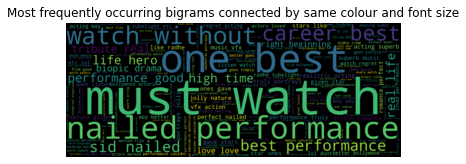

In [30]:
# Generating wordcloud
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 2500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=stop_words_new)
wordCloud.generate_from_frequencies(words_dict)

plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()